# Olympic Tweets

## Load Data

In [53]:
# Load library
library(tidyverse)

# Load the original file
tweets <- read_csv("Olympics_tweets.csv")

# Fix the data types
tweets <- tweets %>% 
  mutate(date = as.POSIXct(date, format = "%d/%m/%Y %H:%M")) %>%
  mutate(user_created_at = as.POSIXct(user_created_at, format = "%d/%m/%Y %H:%M")) %>%
  mutate(user_friends = as.numeric(user_friends)) %>%
  mutate(retweet_count = as.numeric(retweet_count)) %>%
  mutate(favorite_count = as.numeric(favorite_count)) %>%
  mutate(user_followers = as.numeric(user_followers)) %>% 
  mutate(id = as.character(id)) %>% 
  mutate(text = as.character(text)) %>%
  mutate(user_screen_name = as.character(user_screen_name)) %>%
  mutate(user_location = as.character(user_location)) %>% 
  mutate(user_description = as.character(user_description)) %>%
  mutate(language = as.character(language)) %>%
  mutate(favorited = as.logical(favorited))

# Check column type
str(tweets)

Rows: 114213 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (7): text, user_screen_name, user_location, user_description, user_creat...
dbl (5): id, retweet_count, favorite_count, user_followers, user_friends
lgl (1): favorited

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


tibble [114,213 × 13] (S3: tbl_df/tbl/data.frame)
 $ id              : chr [1:114213] "1418962317186779904" "1418962351336920064" "1418962410673689856" "1418962466822830080" ...
 $ text            : chr [1:114213] "Mirabai Chanu's maiden Olympic silver helped India clinch joint-12th spot on the medals tally on Day 1 atâ€¦ ht"| __truncated__ ".@mirabai_chanu brings home first silver medal on Day 1. DSEU congratulates her on this achievement. A brillian"| __truncated__ "Heartiest congratulations to Mirabai Chanu for starting  the medal tally for India in the Tokyo Olympics 2020 b"| __truncated__ "Hearty congratulations to ace Indian weightlifter @mirabai_chanu for winning a Silver in the womenâ€™s #Weightl"| __truncated__ ...
 $ user_screen_name: chr [1:114213] "ITGDsports" "dseu_official" "SutejKumar4" "NsChandapaka" ...
 $ user_location   : chr [1:114213] "Noida- India" NA "New Delhi- India" "Nalgonda- Telangana" ...
 $ retweet_count   : num [1:114213] 1 0 0 1 0 0 0 1 0 0 ...
 $ favori

In [54]:
# Load library
library(lubridate)

# Get user created year
tweets <- tweets %>% mutate(user_created_at_year = year(user_created_at))

# Check result
tweets %>% select(user_created_at, user_created_at_year) %>% head(10)

user_created_at,user_created_at_year
<dttm>,<dbl>
2017-09-26 10:57:00,2017
2020-11-12 09:01:00,2020
2020-04-20 16:56:00,2020
2017-08-08 01:26:00,2017
2016-11-14 17:13:00,2016
2017-07-29 16:19:00,2017
2009-12-25 15:50:00,2009
2010-11-30 16:05:00,2010
2017-12-31 06:33:00,2017


## Data Exploration

In [55]:
# Get dataset dimension
dim(tweets)

[1] 114213     14

In [56]:
# Get statistical information
summary(tweets)

      id                text           user_screen_name   user_location     
 Length:114213      Length:114213      Length:114213      Length:114213     
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
 retweet_count       favorited       favorite_count    user_description  
 Min.   :   0.0000   Mode :logical   Min.   :   0.00   Length:114213     
 1st Qu.:   0.0000   FALSE:114210    1st Qu.:   0.00   Class :character  
 Median :   0.0000   NA's :3         Median :   0.00   Mode  :character  
 Mean   :   0.3502                   Mean   :   2.13                     
 3rd Qu.:   0.

### User create year

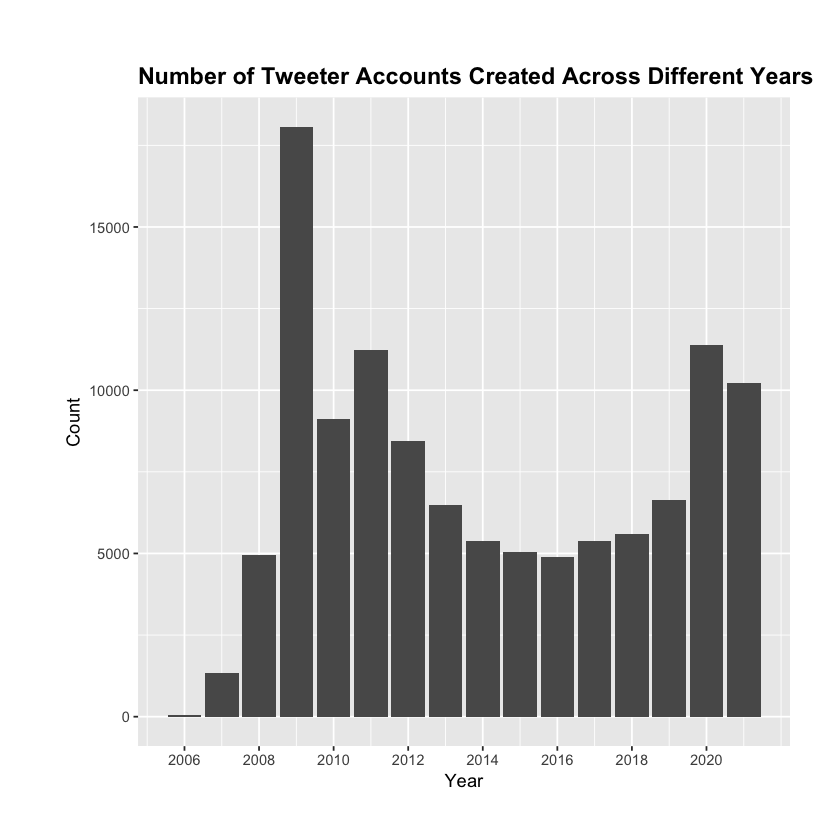

In [67]:
# Create a new data frame for counting user_created_at_year by year
count_create_year <- tweets %>% count(user_created_at_year) %>% na.omit

# Create plot
plot_count_create_year <- count_create_year %>%
                            ggplot(aes(x = user_created_at_year, y = n)) +
                            geom_bar(stat='identity') +
                            labs(title = "Number of Tweeter Accounts Created Across Different Years", x = "Year", y = "Count") + 
                            scale_x_continuous(breaks = seq(min(count_create_year$user_created_at_year), max(count_create_year$user_created_at_year), by = 2)) + 
                            theme(plot.title = element_text(size = 14, face = "bold"), 
                                  plot.margin = margin(40, 30, 30, 40))

# Show plot
plot_count_create_year

# Save plot
ggsave("count_create_year.png", plot = plot_count_create_year, width = 10, height = 6)

### Average user followers (accouts created after 2010)

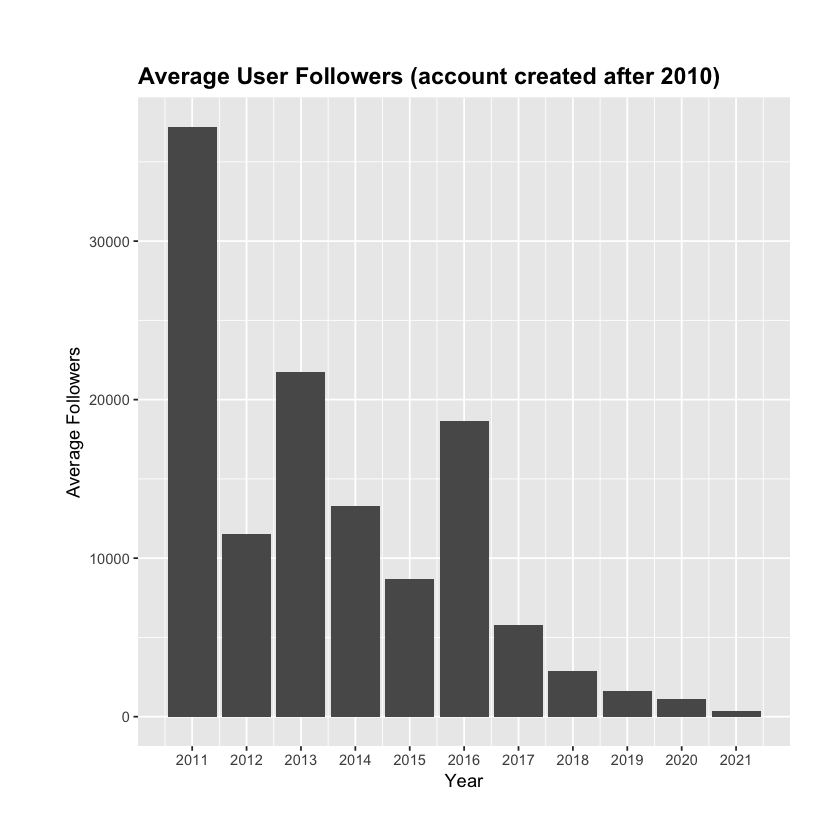

In [58]:

# Create a new data frame to calculate the avg_followers number for plotting
avg_followers <- tweets %>% 
  filter(user_created_at_year > 2010) %>% 
  select(user_created_at_year, user_followers) %>%
  group_by(user_created_at_year) %>%
  summarise(avg_followers = mean(user_followers, na.rm = TRUE))

# Create plot
plot_avg_followers <- avg_followers %>% 
                        ggplot(aes(x = user_created_at_year, y = avg_followers)) + 
                        geom_bar(stat='identity') + 
                        labs(title = "Average User Followers (account created after 2010)", x = "Year", y = "Average Followers") + 
                        scale_x_continuous(breaks = seq(min(avg_followers$user_created_at_year), max(avg_followers$user_created_at_year))) +                             
                        theme(plot.title = element_text(size = 14, face = "bold"), 
                              plot.margin = margin(40, 30, 30, 40))

# Show plot
plot_avg_followers

# Save plot
ggsave("avg_followers.png", plot = plot_avg_followers, width = 10, height = 6)

### Average user friends (accouts created after 2010)

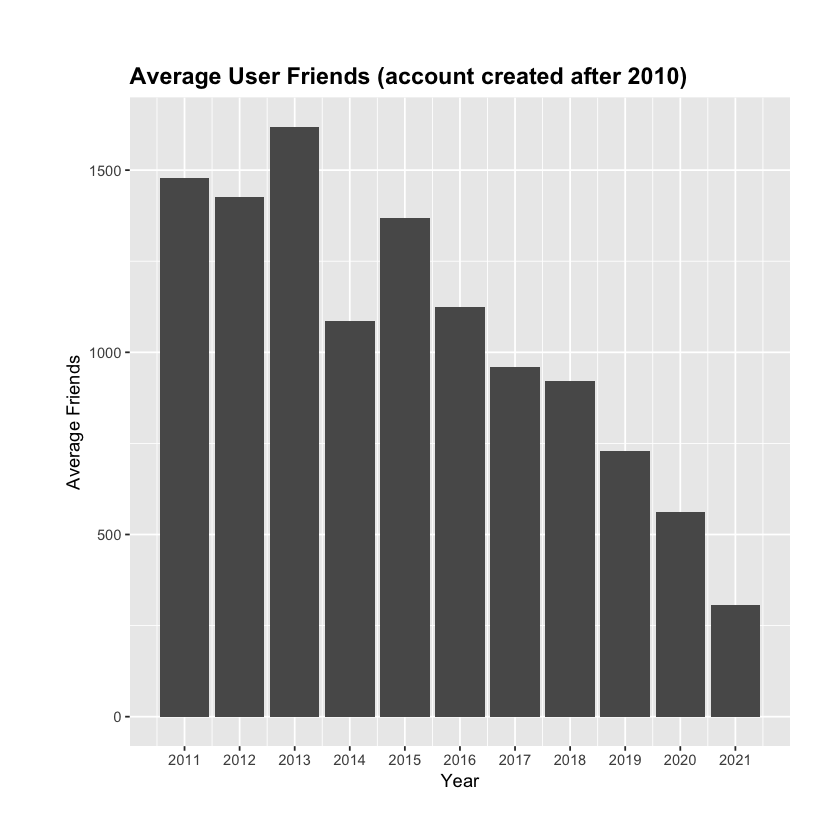

In [59]:
# Create a new data frame for calculating avg user friends
avg_friends <- tweets %>%
  filter(user_created_at_year > 2010) %>%
  select(user_created_at_year, user_friends) %>%
  group_by(user_created_at_year) %>%
  summarise(avg_friends = mean(user_friends, na.rm=TRUE))

# Create plot
plot_avg_friends <- avg_friends %>% 
                    ggplot(aes(x = user_created_at_year, y = avg_friends)) +
                    geom_bar(stat='identity') +
                    labs(title = "Average User Friends (account created after 2010)", x = "Year", y = "Average Friends") + 
                    scale_x_continuous(breaks = seq(min(avg_friends$user_created_at_year), max(avg_friends$user_created_at_year))) + 
                    theme(plot.title = element_text(size = 14, face = "bold"), 
                          plot.margin = margin(40, 30, 30, 40)) 

# Show plot
plot_avg_friends

# Save plot
ggsave("avg_friends.png", plot = plot_avg_friends, width = 10, height = 6)

## Data Transformation

### Dates of tweets

date,date_extracted
<dttm>,<date>
2021-07-24 15:52:00,2021-07-24
2021-07-24 15:52:00,2021-07-24
2021-07-24 15:52:00,2021-07-24
2021-07-24 15:53:00,2021-07-24
2021-07-24 15:53:00,2021-07-24


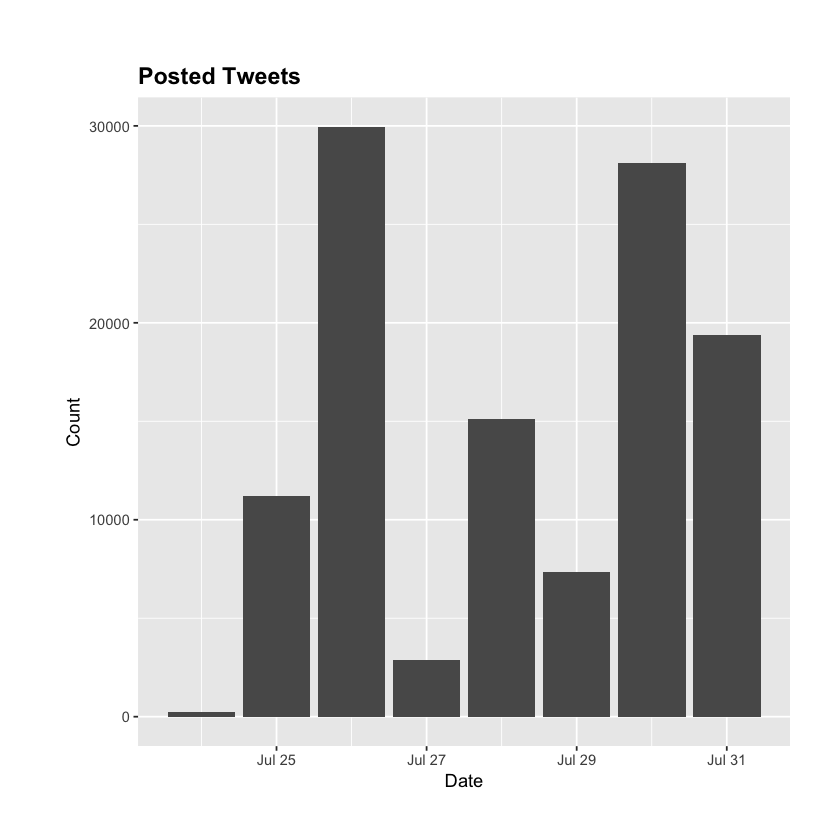

In [60]:
# Extract dates from "date" of tweets
tweets <- tweets %>% 
  mutate(date_extracted = ymd(substr(date, 1, 10)))

# Check result
tweets %>% select(date, date_extracted) %>% head(5)

# Create count_date data frame
count_date <- tweets %>% filter(!is.na(date_extracted)) %>% count(date_extracted)

# Create plot
plot_count_date <- count_date %>% 
                    ggplot(aes(x = date_extracted, y = n)) +
                    geom_bar(stat='identity') + 
                    labs(title="Posted Tweets", x="Date", y = "Count") + 
                    theme(plot.title = element_text(size = 14, face = "bold"),
                      plot.margin = margin(40, 30, 30, 40))

# Show plot
plot_count_date

# Save plot
ggsave("count_date.png", plot = plot_count_date, width = 6, height = 6)

### Text length

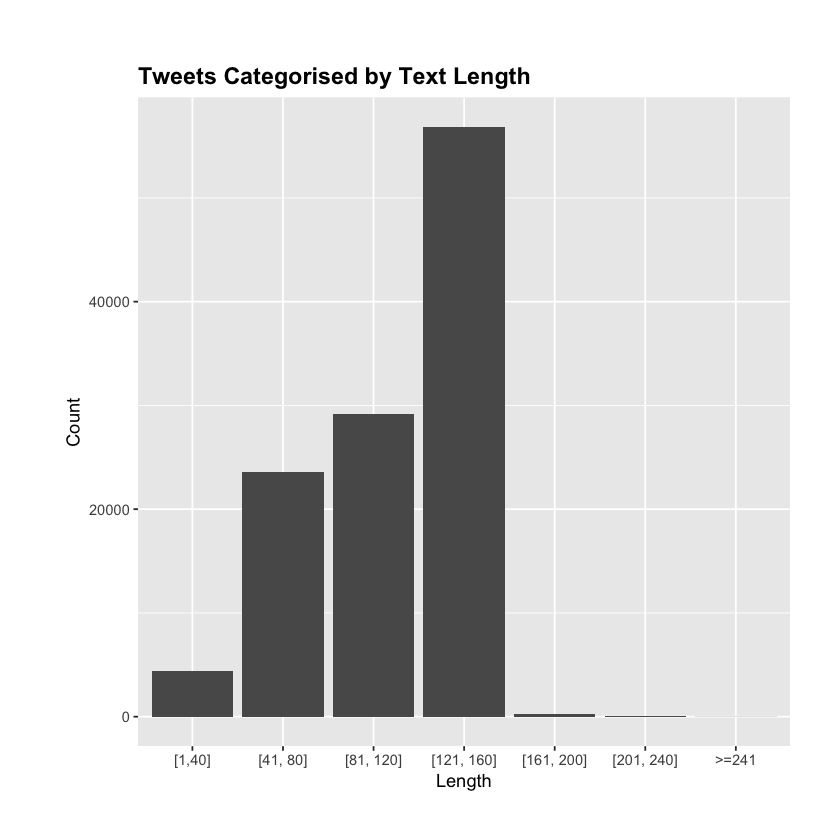

In [68]:
# Categorising text length
tweets <- tweets %>% 
            filter(!is.na(text)) %>% 
            mutate(length = nchar(text)) %>%
            mutate(len_category = case_when(
                length <= 40 ~ "[1,40]",
                length >= 41 & length <= 80 ~ "[41, 80]",
                length >= 81 & length <=120 ~ "[81, 120]",
                length >= 121 & length <= 160 ~ "[121, 160]",
                length >= 161 & length <= 200 ~ "[161, 200]",
                length >= 201 & length <= 240 ~ "[201, 240]",
                length >= 241 ~">=241"))

# Create tweets_len data frame
tweets_len <- tweets %>% count(len_category)

# Define the order for the factor levels based on the length categories
len_order <- c("[1,40]", "[41, 80]", "[81, 120]", "[121, 160]", "[161, 200]", "[201, 240]", ">=241")

# Reorder 'len_category' to follow the specified order
tweets_len$len_category <- factor(tweets_len$len_category, levels = len_order)

# Create plot
plot_tweets_len <- tweets_len %>% 
                    ggplot(aes(x = len_category, y = n)) + 
                    geom_bar(stat='identity') + 
                    labs(title="Tweets Categorised by Text Length", x = "Length", y = "Count") + 
                    theme(plot.title = element_text(size = 14, face = "bold"),
                          plot.margin = margin(40, 30, 30, 40))

# Show plot
plot_tweets_len

# Save plot
ggsave("tweets_len.png", plot = plot_tweets_len, width = 6, height = 6)
